<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain Prediction in Australia**

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [ ]:
import pandas as pd

# Define the URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

# Read the data from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())



       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017

In [ ]:
df.shape[0]

3271

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [ ]:
df.drop(columns='Date', inplace=True)


In [ ]:
nan_df = df.isna()
nan_count = nan_df.sum()
nan_count

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## hence the data dosent contain any NaN values . lets visualize the data and pre process it.

In [ ]:
df.head(30)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,9,...,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,18.6,26.3,6.2,5.2,5.2,W,41,W,S,15,...,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,7,...,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,19,...,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,11,...,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


# Data Preprocessing
### One Hot Encoding¶
First, we need to perform one hot encoding to convert categorical variables to binary variables.

In [ ]:
df1= pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [ ]:
df1.replace(['No', 'Yes'], [0,1], inplace=True)

In [ ]:
df1.head()
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


## lets perform some visualization.

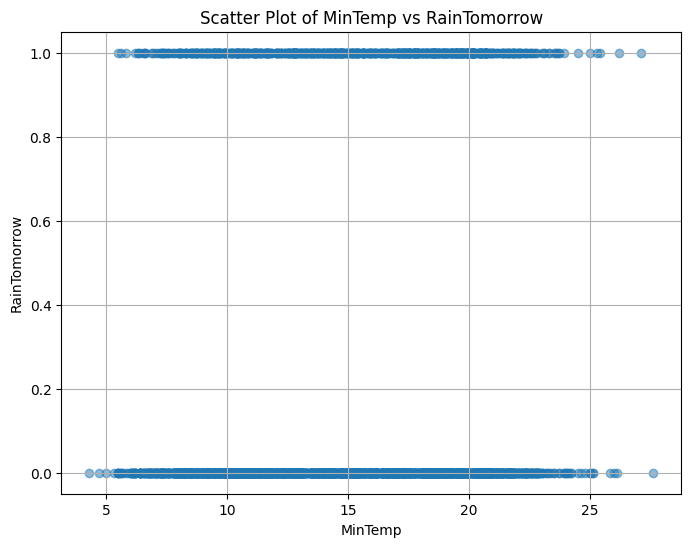

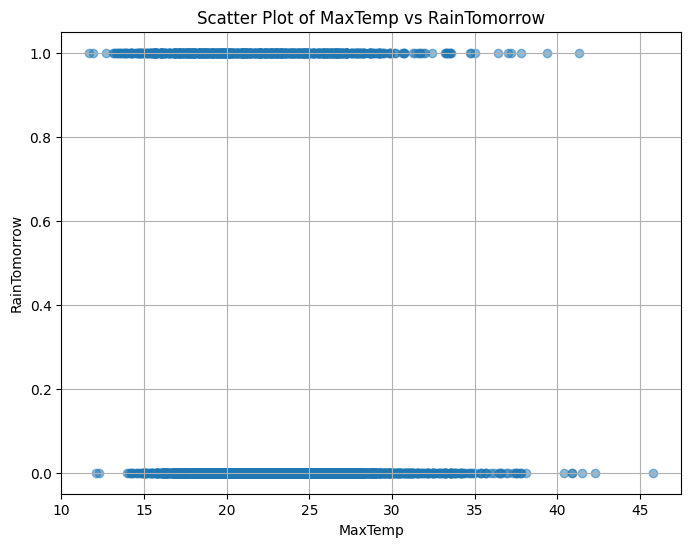

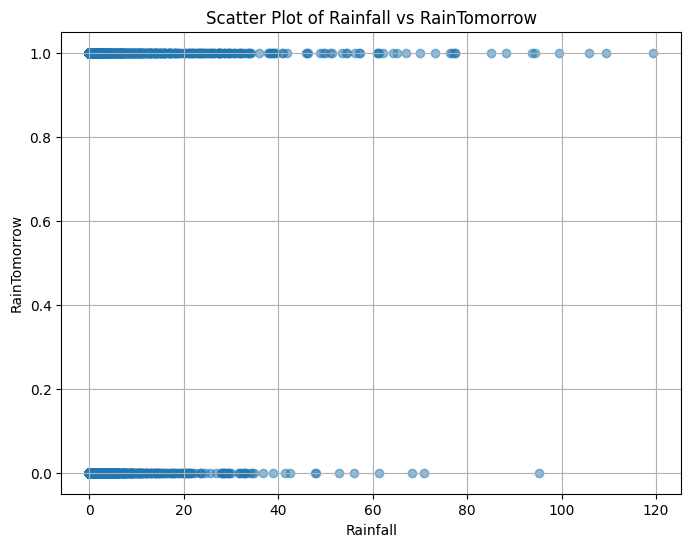

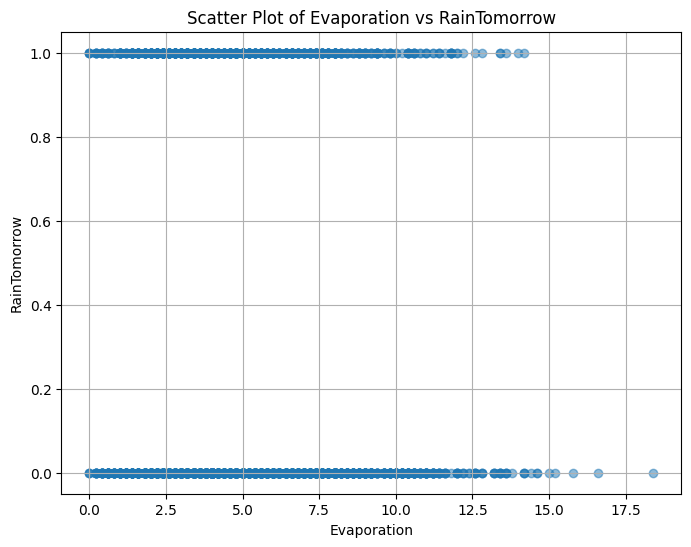

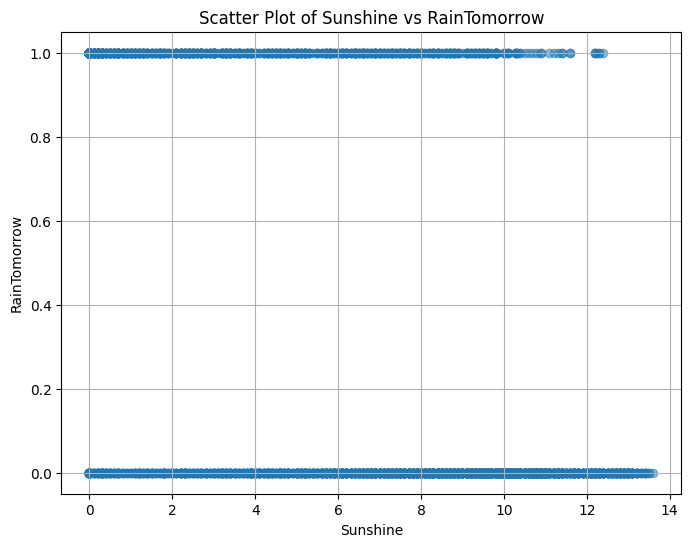

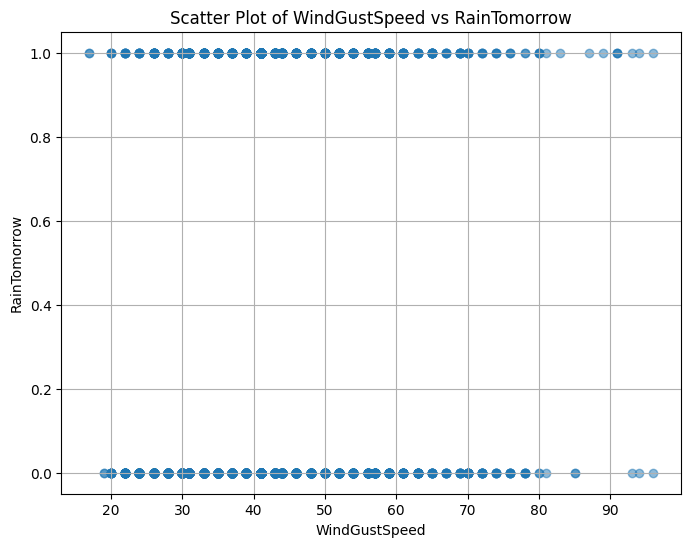

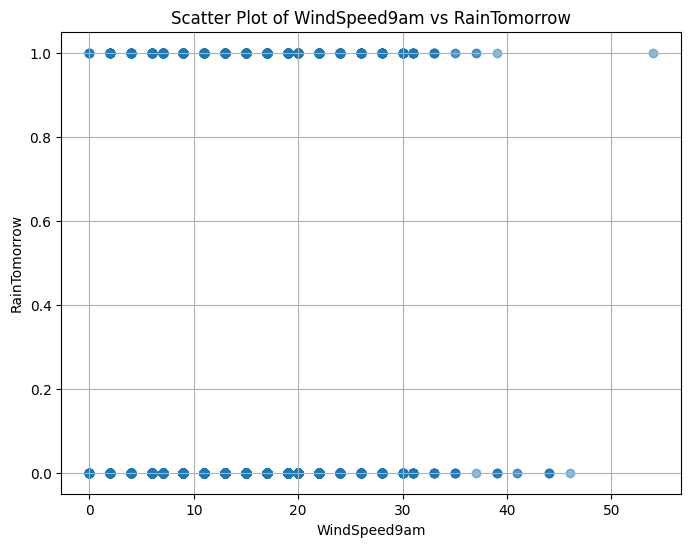

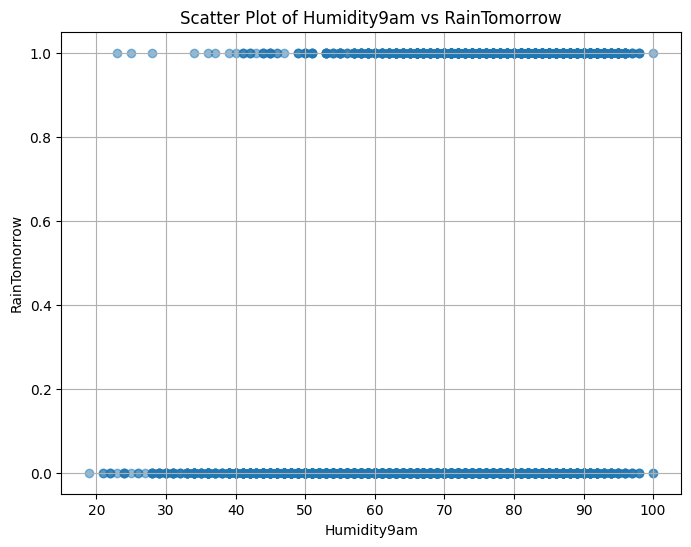

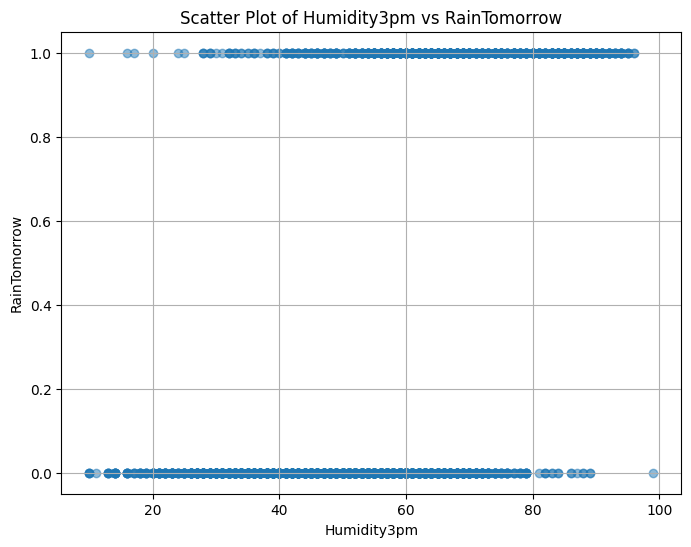

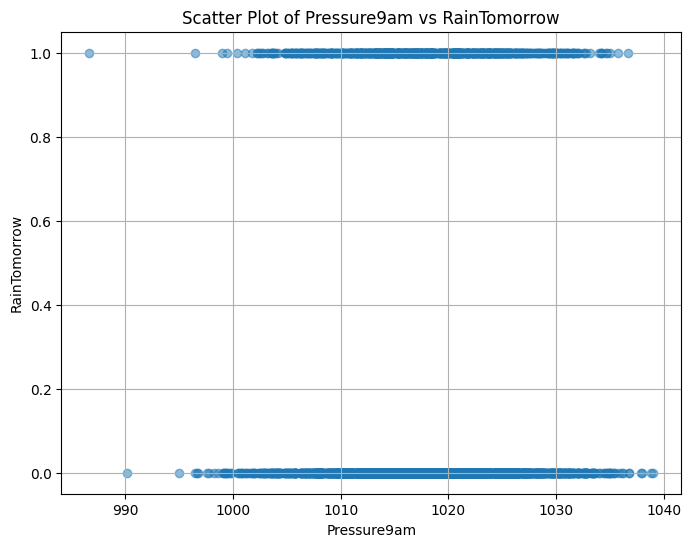

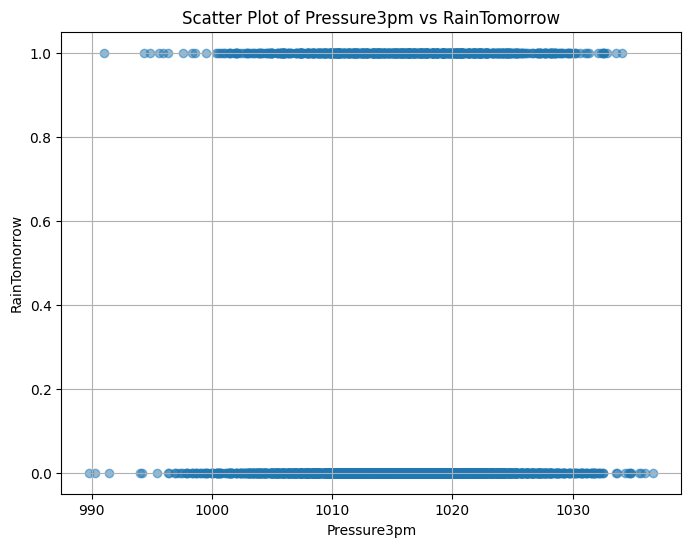

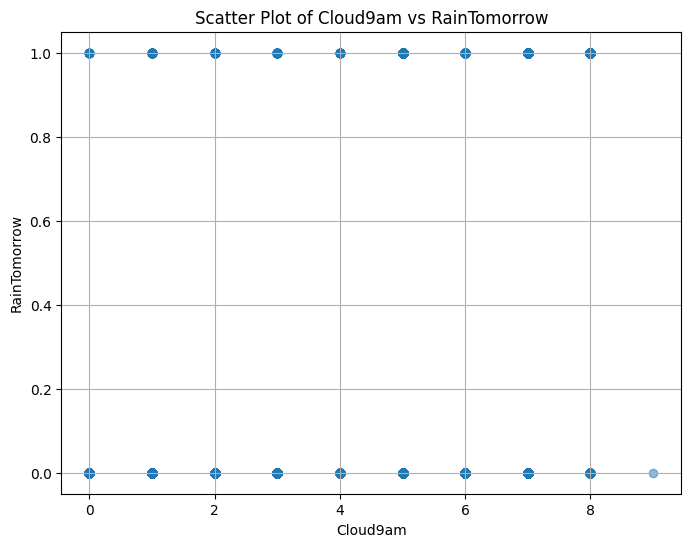

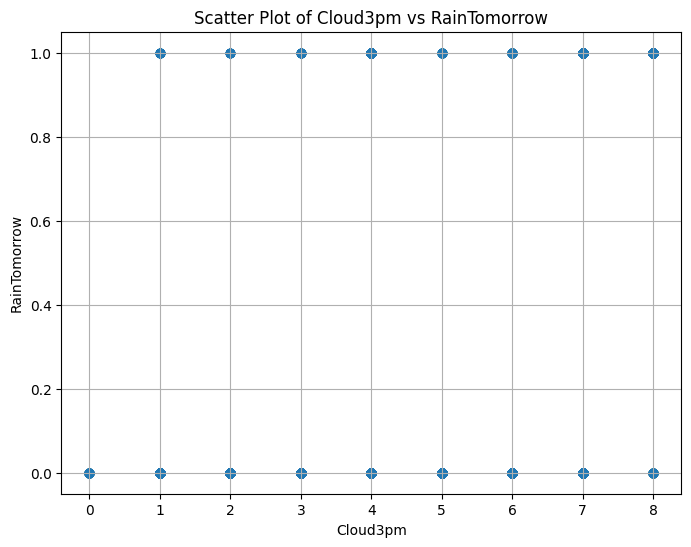

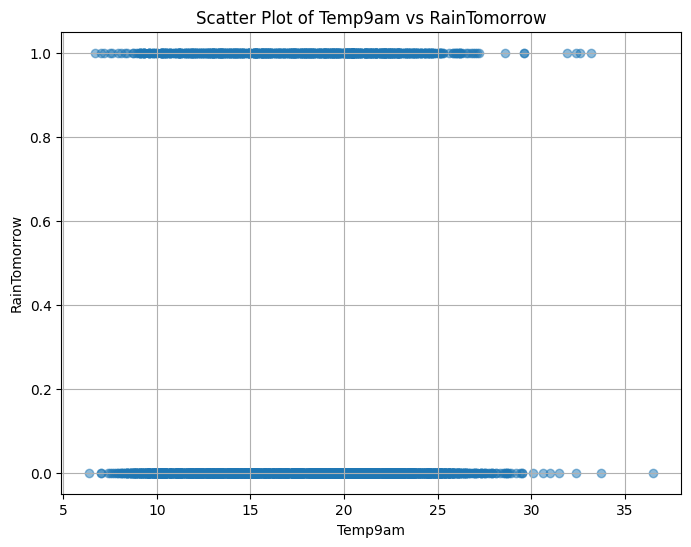

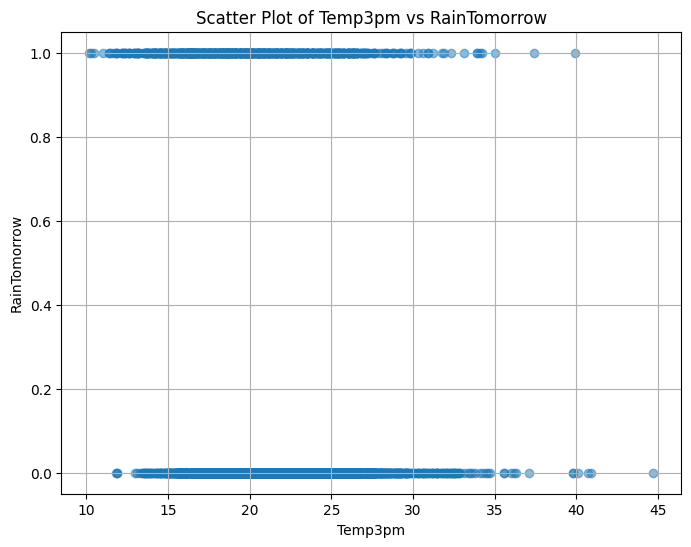

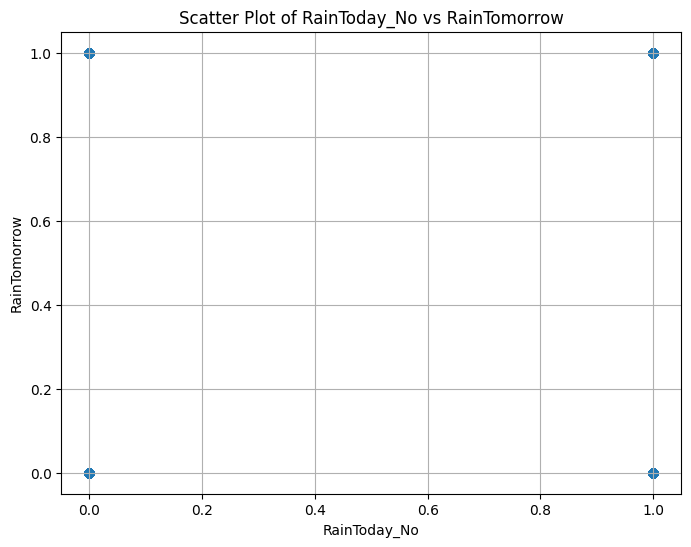

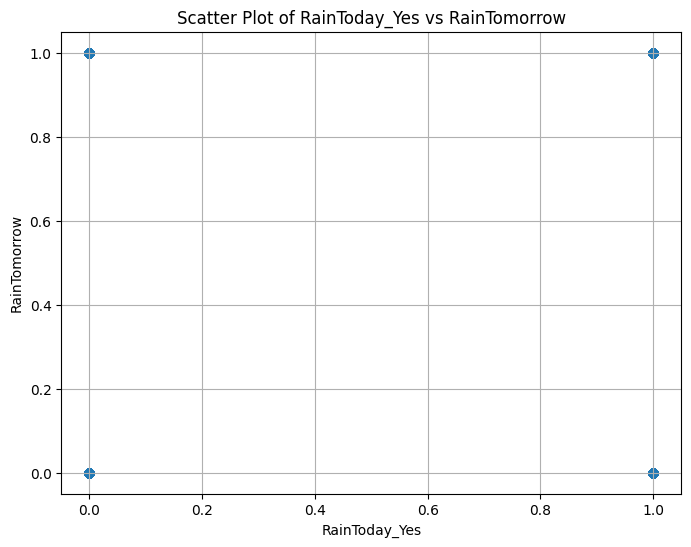

In [ ]:
import matplotlib.pyplot as plt

# List of columns to create scatter plots for
columns_to_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                   'WindSpeed9am', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                   'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday_No', 'RainToday_Yes']

# Loop through each column and create a scatter plot
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df1[column], df1['RainTomorrow'], alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs RainTomorrow')
    plt.xlabel(column)
    plt.ylabel('RainTomorrow')
    plt.grid(True)
    plt.show()



In [ ]:
features = df1.drop(columns='RainTomorrow', axis=1)
features
Y =df1['RainTomorrow']

In [ ]:
# lets perform noemalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# LETS SPLIT THE DATA FOR TESTING AND TRAINING .

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_normalized, Y, test_size=0.2, random_state=10)

## MODEL 1 --> **Linear Regression**

In [ ]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
pre = LinearReg.predict(X_test)
pre

array([ 1.24027395e-01,  2.69535208e-01,  9.72599172e-01,  2.87113333e-01,
        1.29764700e-01,  4.54837942e-01,  3.61820364e-01,  8.59134817e-01,
        6.76761770e-01,  3.51602076e-02,  6.35161385e-03,  2.78995657e-01,
        3.37162161e-01,  7.78237818e-02,  6.13442896e-02,  5.60672903e-01,
       -5.88339330e-02,  5.17704153e-01,  1.58390188e-01,  3.56205129e-01,
        5.59121607e-02,  8.97892141e-01,  4.64786672e-01,  2.00687551e-01,
       -7.77548315e-02,  3.79154348e-01,  5.42362356e-01, -2.58749486e-02,
        6.41117239e-01, -1.06014109e-01,  3.78360891e-01,  1.21585989e-01,
       -2.37997533e-02,  5.23721217e-02,  5.70804739e-01,  1.06567779e+00,
       -5.61127677e-03,  5.14652395e-01, -9.03280736e-02,  6.73867701e-02,
        2.17324732e-02,  8.72196340e-01,  2.39505911e-01,  3.97220754e-01,
        2.63370657e-01,  4.44339895e-01, -5.10214330e-02,  1.87931204e-01,
        7.75699758e-01,  1.54544973e-01,  1.71294198e-03, -5.76132299e-02,
        2.04044485e-01, -

In [ ]:
LinearReg.score(X_test, y_test)

0.4264959267769872

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predictions = LinearReg.predict(X_test)
LinearRegression_MAE = mean_absolute_error(y_test, pre)
LinearRegression_MSE = mean_squared_error(y_test, pre)
LinearRegression_R2 = r2_score(y_test, pre)


print(f"Linear Regression MAE: {LinearRegression_MAE}")
print(f"Linear Regression MSE: {LinearRegression_MSE}")
print(f"Linear Regression R-squared (R2): {LinearRegression_R2}")

Linear Regression MAE: 0.25636222495705896
Linear Regression MSE: 0.11584909271440863
Linear Regression R-squared (R2): 0.4264959267769872


R-squared (R2):

How Much: Higher is better. R2 ranges from 0 to 1, with 1 indicating a perfect fit.
Use: To measure how well the regression model fits the data. R2 quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables.
Mean Absolute Error (MAE):

How Much: Lower is better. Ideally as close to 0 as possible.
Use: To measure the average absolute difference between predicted and actual values. It provides a straightforward interpretation of model accuracy.
Mean Squared Error (MSE):

How Much: Lower is better. Ideally as close to 0 as possible.
Use: To measure the average squared difference between predicted and actual values. MSE gives more weight to large errors compared to MAE.

# MODEL --> 2 **KNN**


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4)

# Train the KNN model using the training data (x_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions = KNN.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
KNN.score(X_test, y_test)

0.7603053435114504

In [ ]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score


KNN_Accuracy_Score = accuracy_score(y_test, KNN.predict(X_test))
KNN_JaccardIndex = jaccard_score(y_test, KNN.predict(X_test))
KNN_F1_Score = f1_score(y_test, KNN.predict(X_test))


In [ ]:
print("KNN_Accuracy_Score :",KNN_Accuracy_Score)
print("KNN_JaccardIndex  :",KNN_JaccardIndex)
print("KNN_F1_Score :",KNN_F1_Score)


KNN_Accuracy_Score : 0.7603053435114504
KNN_JaccardIndex  : 0.24154589371980675
KNN_F1_Score : 0.3891050583657587


Accuracy Score:

How Much: Higher is better. Ideally close to 100%, but it depends on the problem and dataset.
Use: To assess overall correctness in classification.
Jaccard Index:

How Much: Closer to 1 indicates a better model. High values indicate similarity between predicted and actual labels.
Use: To measure similarity between predicted and actual labels, with a focus on positive predictions.
F1 Score:

How Much: Ideally close to 1. Balances precision and recall.
Use: To strike a balance between minimizing false positives and false negatives.

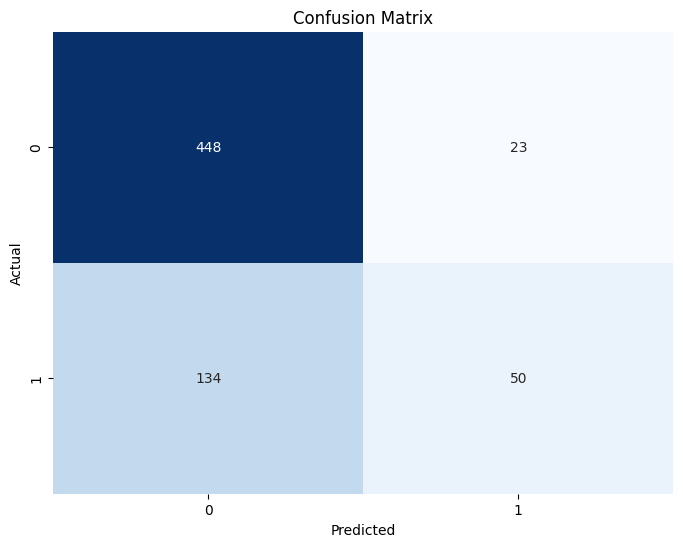

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Use the trained KNN model to make predictions on the test data
y_pred = KNN.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



#  model -3 **Decision Tree**

In [ ]:
Tree = DecisionTreeClassifier()

Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = Tree.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print("Tree_Accuracy_Score",Tree_Accuracy_Score)
print("Tree_JaccardIndex",Tree_JaccardIndex)
print("Tree_F1_Score",Tree_F1_Score)

Tree_Accuracy_Score 0.7572519083969466
Tree_JaccardIndex 0.4044943820224719
Tree_F1_Score 0.5760000000000001


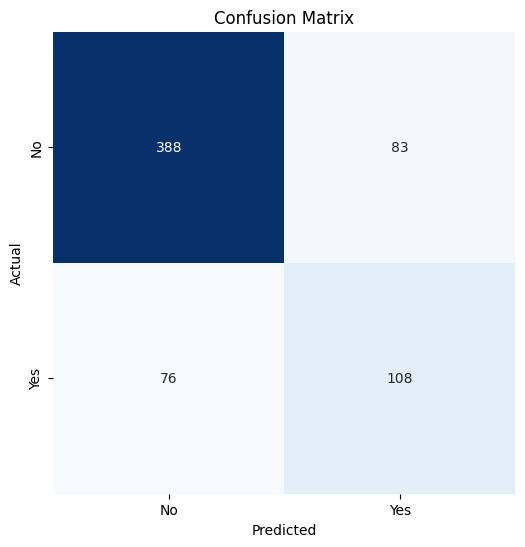

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# model ---- > 4   **Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [ ]:
LR = LogisticRegression()
prediction =  LR.fit(X_train, y_train)

In [ ]:
predictions = LR.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
predict_proba = LR.predict_proba(X_test)
predict_proba

array([[0.65001263, 0.34998737],
       [0.97936662, 0.02063338],
       [0.56493854, 0.43506146],
       ...,
       [0.9726478 , 0.0273522 ],
       [0.8098846 , 0.1901154 ],
       [0.43310657, 0.56689343]])

In [ ]:
LR.score(X_test,y_test)

0.8259541984732824

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

print("LR_Accuracy_Score",LR_Accuracy_Score)
print("LR_JaccardIndex",LR_JaccardIndex)
print("LR_F1_Score",LR_F1_Score)
print("LR_Log_Loss",LR_Log_Loss)

LR_Accuracy_Score 0.8259541984732824
LR_JaccardIndex 0.4722222222222222
LR_F1_Score 0.6415094339622641
LR_Log_Loss 0.38441858826250663


Logarithmic Loss (Log Loss):

How Much: Lower is better. Log loss is typically in the range of 0 to ∞.
Use: Commonly used for evaluating classification models, especially in probabilistic predictions.
It measures the performance of a classification model where the prediction is a probability value between 0 and 1.

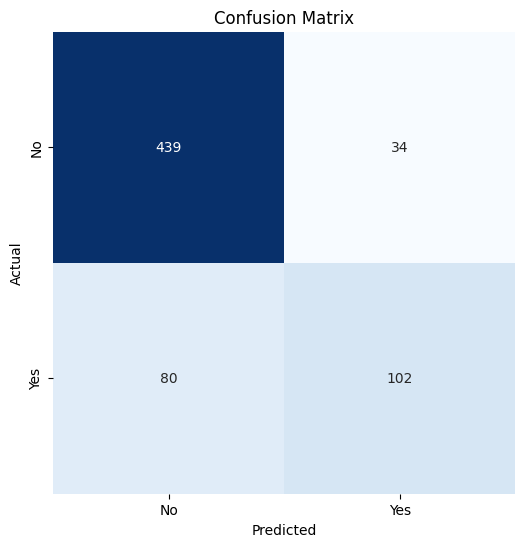

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#model -> 5 **SVM**

In [ ]:
from sklearn.svm import SVC
SVM = SVM = SVC(kernel='linear', C=1)
SVM.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
predictions = SVM.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:

SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

print("SVM_Accuracy_Score",SVM_Accuracy_Score)
print("SVM_JaccardIndex",SVM_JaccardIndex)
print("SVM_F1_Score",SVM_F1_Score)


SVM_Accuracy_Score 0.8458015267175573
SVM_JaccardIndex 0.5345622119815668
SVM_F1_Score 0.6966966966966968


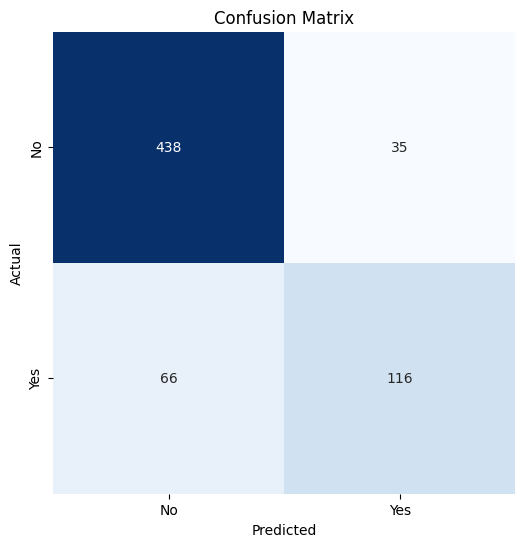

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd


data = {'Model': ['Linear Regression', 'KNN', 'SVM', 'Logistic Regression'],
        'Accuracy': [LR_Accuracy_Score, KNN_Accuracy_Score, SVM_Accuracy_Score, LR_Accuracy_Score],
        'Jaccard Index': [LR_JaccardIndex, KNN_JaccardIndex, SVM_JaccardIndex, LR_JaccardIndex],
        'F1-Score': [LR_F1_Score, KNN_F1_Score, SVM_F1_Score, LR_F1_Score],
        'LogLoss': [LR_Log_Loss, None, None, LR_Log_Loss]}

df_metrics = pd.DataFrame(data)


print(df_metrics)


                 Model  Accuracy  Jaccard Index  F1-Score   LogLoss
0    Linear Regression  0.825954       0.472222  0.641509  0.384419
1                  KNN  0.760305       0.241546  0.389105       NaN
2                  SVM  0.845802       0.534562  0.696697       NaN
3  Logistic Regression  0.825954       0.472222  0.641509  0.384419
